<a href="https://colab.research.google.com/github/2303A510A3/AIML-LAB/blob/main/Assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement Logistic Regression Model Using Titanic Ship Dataset

In [12]:
#import nbconvert #recode the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


 Load the Titanic Dataset

In [14]:
# Load the Titanic dataset (assuming 'titanic.csv' is the dataset file)
titanic_df = pd.read_csv('/content/Titanic-Dataset.csv')

# Display the first few rows
print(titanic_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


 Check Data Types of Each Feature

In [15]:
print(titanic_df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Generate a Summary of the Dataset

In [16]:
summary = titanic_df.describe(percentiles=[.25, .5, .75, .9])
print(summary)


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
90%     802.000000    1.000000    3.000000   50.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
90%      2.000000   77.958300  
max      6.

List the Names of Columns/Features

In [17]:
print("Columns in the dataset:")
print(titanic_df.columns.tolist())


Columns in the dataset:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


 Perform Exploratory Analysis

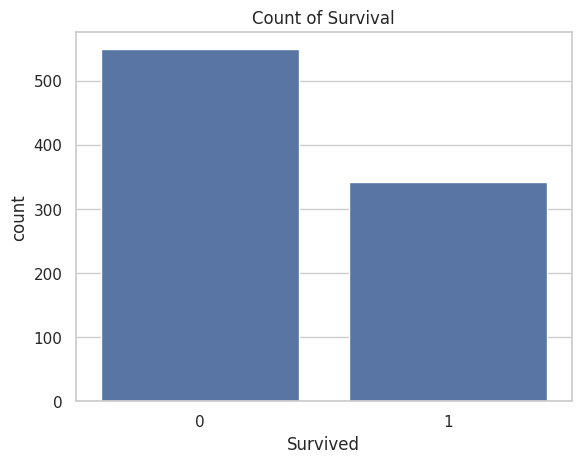

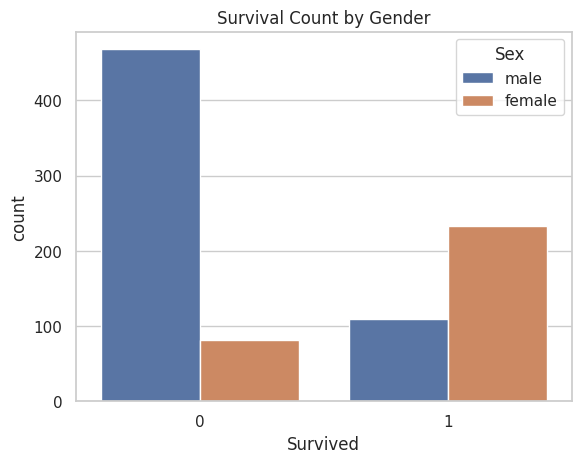

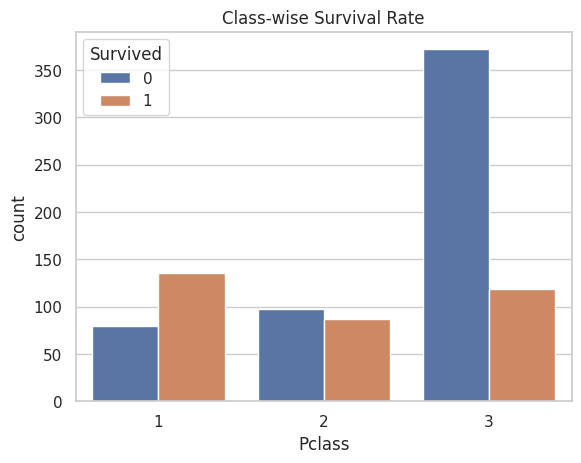

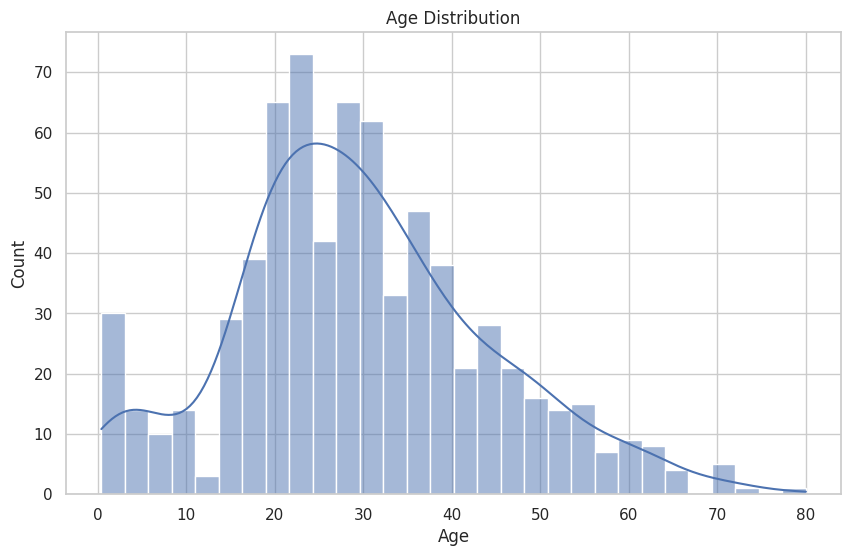

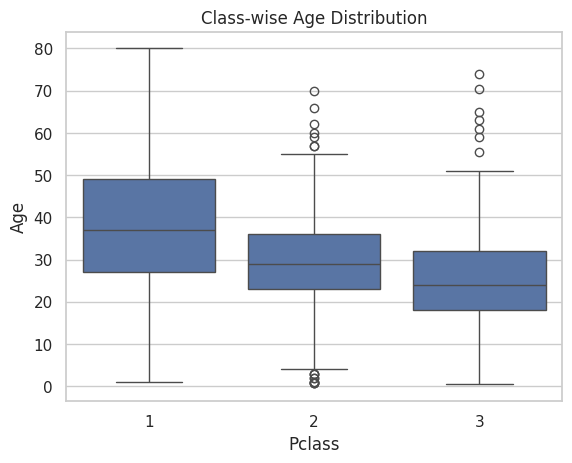

In [18]:
# Check survival rate
sns.countplot(x='Survived', data=titanic_df)
plt.title('Count of Survival')
plt.show()

# Check survival rate by gender
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.title('Survival Count by Gender')
plt.show()

# Check survival rate by class
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Class-wise Survival Rate')
plt.show()

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Class-wise age distribution
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.title('Class-wise Age Distribution')
plt.show()


 Data Wrangling

In [19]:
# Impute missing age values with the median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Drop unnecessary columns (e.g., 'Cabin' due to too many missing values, 'Name', 'Ticket' for simplicity)
titanic_df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

# Encode categorical features (e.g., 'Sex' and 'Embarked')
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Embarked'].fillna('S', inplace=True)
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Verify changes
print(titanic_df.head())


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    0  22.0      1      0   7.2500         0
1            2         1       1    1  38.0      1      0  71.2833         1
2            3         1       3    1  26.0      0      0   7.9250         0
3            4         1       1    1  35.0      1      0  53.1000         0
4            5         0       3    0  35.0      0      0   8.0500         0


<ipython-input-19-493a991edf41>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
<ipython-input-19-493a991edf41>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Part 2 – Model Training and Evaluation


Split the Data into Training and Testing Sets

In [20]:
# Define X (features) and Y (target)
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


 Apply Logistic Regression Model

In [21]:
logreg = LogisticRegression(max_iter=1000)

# Fit the model
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Compute the F1 Score and Plot Results

F1 Score: 0.7547169811320755


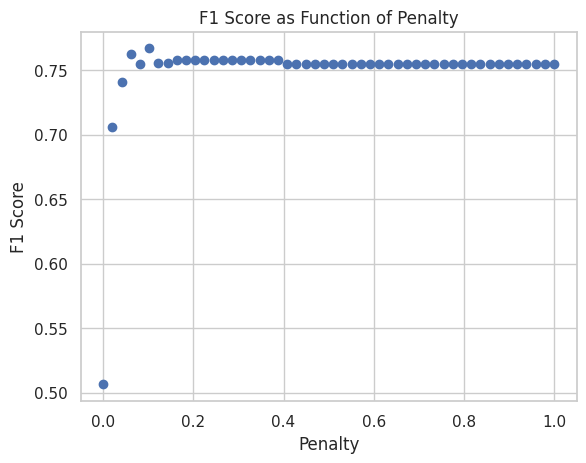

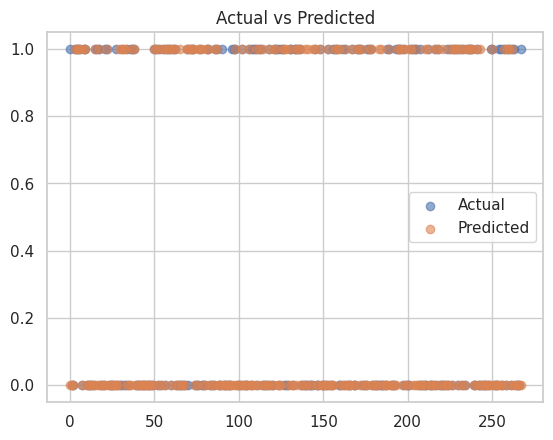

In [22]:
# Predict on test data
y_pred = logreg.predict(X_test)

# Compute F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# Scatter plot for visualization
penalty_range = np.linspace(0, 1, 50)
f1_scores = []

for penalty in penalty_range:
    logreg = LogisticRegression(C=penalty + 0.01, max_iter=1000)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))

plt.scatter(penalty_range, f1_scores)
plt.xlabel('Penalty')
plt.ylabel('F1 Score')
plt.title('F1 Score as Function of Penalty')
plt.show()

# Scatter plot of test data predictions
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.6)
plt.scatter(range(len(y_test)), y_pred, label='Predicted', alpha=0.6)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()
